CNN final project


Team Members:
Name ID
Venkata Sai Bhargav VEERAMSETTY - 101149826
Siva prasad reddy nalamaru - 101139281
Kareem Abdul-  101111784
Mahabub Shaariief Shaik - 101163600
Hussainamma Shaik - 101159835
Sai Harshitha Laggu -  101163328
Yesaswini Kalahasti - 101165876



With the MNIST dataset, a Convolutional Neural Network (CNN) for handwritten digit recognition is implemented in this research. We first preprocess the data before designing a CNN architecture that consists of fully connected, max-pooling, and convolutional layers. The model is trained on the dataset, and its performance is assessed through the use of measures like accuracy and loss curves. For a robust examination, K-Fold Cross Validation is used. Along with schematics showing the CNN architecture, the project offers comprehensive documentation of the specifications and measurements of each network component. Results analysis provides information about how CNN components affect performance as well as how to interpret the confusion matrix. This project provides hands-on experience with CNN implementation for model evaluation and image categorization.

Importing Libariers

In [1]:
pip install ucimlrepo

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from keras.utils import to_categorical
from ucimlrepo import fetch_ucirepo

1) Data Preparation & Importing Data Sets

In [3]:
from sklearn.datasets import load_digits

# fetch dataset
digits = load_digits()

# data
X = digits.data
y = digits.target

# metadata
print(digits.DESCR)

# feature names
print(digits.feature_names)


.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

Preprocesing started..

In [6]:
from sklearn.datasets import load_digits

# Load the dataset
digits = load_digits()

# Extracting the feature and target variables
X = digits.data
y = digits.target


In [7]:
from sklearn.model_selection import train_test_split
import numpy as np

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data (Normalization and Reshaping)
X_train = X_train.astype('float32') / 16.0  # Normalization
X_test = X_test.astype('float32') / 16.0    # Normalization
X_train = np.expand_dims(X_train, axis=-1)  # Reshaping
X_test = np.expand_dims(X_test, axis=-1)    # Reshaping


In [8]:
import pandas as pd

# Reshape data to 2D
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)  # Reshaping to (number of samples, 64)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)  # Reshaping to (number of samples, 64)

# Create pandas DataFrames
train_df = pd.DataFrame(X_train_reshaped, columns=[f"Pixel_{i}" for i in range(X_train_reshaped.shape[1])])
test_df = pd.DataFrame(X_test_reshaped, columns=[f"Pixel_{i}" for i in range(X_test_reshaped.shape[1])])

# Display the first few rows of each DataFrame
print("Training Data:")
print(train_df.head())
print("\nTesting Data:")
print(test_df.head())


Training Data:
   Pixel_0  Pixel_1  Pixel_2  Pixel_3  Pixel_4  Pixel_5  Pixel_6  Pixel_7  \
0      0.0   0.0000   0.1875   0.8750   0.0625   0.0000      0.0      0.0   
1      0.0   0.0000   0.5625   0.5625   0.2500   0.0000      0.0      0.0   
2      0.0   0.0000   0.0000   0.6250   0.8125   0.1875      0.0      0.0   
3      0.0   0.0625   0.6250   1.0000   1.0000   0.6875      0.0      0.0   
4      0.0   0.0000   0.3750   0.8750   0.8125   0.1875      0.0      0.0   

   Pixel_8  Pixel_9  ...  Pixel_54  Pixel_55  Pixel_56  Pixel_57  Pixel_58  \
0      0.0   0.0000  ...    0.6875       0.0       0.0    0.0000    0.1875   
1      0.0   0.0000  ...    0.0000       0.0       0.0    0.0000    0.3750   
2      0.0   0.0000  ...    0.0625       0.0       0.0    0.0000    0.1250   
3      0.0   0.3125  ...    0.2500       0.0       0.0    0.0625    0.9375   
4      0.0   0.0000  ...    0.1250       0.0       0.0    0.0000    0.2500   

   Pixel_59  Pixel_60  Pixel_61  Pixel_62  Pixel_63  

First few training images and their labels:


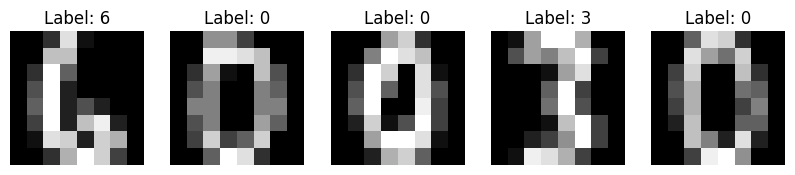

First few testing images and their labels:


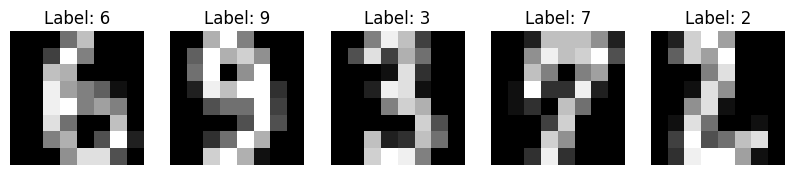

In [9]:
import matplotlib.pyplot as plt

# Function to display images
def display_images(images, labels, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(10, 3))
    for i in range(num_images):
        axes[i].imshow(images[i].reshape(8, 8), cmap='gray')
        axes[i].set_title(f'Label: {labels[i]}')
        axes[i].axis('off')
    plt.show()

# Display the first few images and labels from the training and testing datasets
print("First few training images and their labels:")
display_images(X_train, y_train)

print("First few testing images and their labels:")
display_images(X_test, y_test)


In order to guarantee stable training, avoid optimization problems, equalize feature priority, regularize the model, and enhance interpretability, normalization is necessary. Normalization improves the model's performance.

 Convolutiomnal Neural Network Architecture

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D

# Define CNN architecture
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(8, 8, 1), name="Conv2D_1"))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', name="Conv2D_2"))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', name="Conv2D_3"))
model.add(Conv2D(256, kernel_size=(2, 2), activation='relu', name="Conv2D_4"))


1) Four convolutional layers make up the architecture, and a ReLU activation function comes after each.

2) 32 filters of size (3, 3) are applied to input pictures with the shape (8, 8, 1) by the first convolutional layer (Conv2D_1).

3) The number of filters in subsequent layers is increased, which may enable the capture of more intricate patterns in the data.

4) With a smaller kernel size of (2, 2), the final convolutional layer (Conv2D_4) may be able to capture more minute details in the feature maps.


Max Pooling

In [16]:
model.pop()

# Add the max pooling layer again with the same name
model.add(MaxPooling2D((2, 2), name="MaxPooling2D_1"))


The MaxPooling2D layers use the maximum value in each region determined by the pool size to downsample feature maps.

minimizes spatial dimensions while keeping significant characteristics.

Flattern Layer

In [17]:
#flattern layer
model.add(Flatten(name="Flatten"))

4)Fully Connected Layer and Softmax

In [18]:
from tensorflow.keras.layers import Dense

# Add Dense layers
model.add(Dense(64, activation='relu', name="Dense_1"))
model.add(Dense(10, activation='softmax', name="Output"))


Obserrvation : Convolutional layers' output is transformed into a 1D array by the flatten layer.

The 64 neurons in the Dense_1 layer are activated by ReLU.
Ten neurons in the output layer are activated using softmax for categorization.
These convolutional layers extract features, which these dense layers use to accomplish classification. Every neuron in the dense layer is linked to every other neuron in the layer above it. To add non-linearity, ReLU activation functions are frequently employed in hidden dense layers. For multi-class classification tasks, where each neuron reflects the likelihood of a specific class, the output layer usually uses softmax activation. As there are ten classes in this classification task, there are ten neurons in the output layer.Convolutional layers' output is transformed into a 1D array by the flatten layer.
64 neurons in the Dense_1 layer are ReLU activated.
Ten neurons in the output layer have softmax activity for categorization.

Based on the features that the convolutional layers extracted, these dense layers classify data. Every neuron in the layer above is linked to every other neuron in the dense layer. ReLU activation functions are frequently employed to add non-linearity to hidden dense layers. For multi-class classification problems, the output layer usually uses softmax activation, where each neuron represents the likelihood of a specific class. Ten neurons make up the output layer in this instance, which is equivalent to the ten classes in the classification test.


parameters and dimensions.

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D_1 (Conv2D)           (None, 6, 6, 32)          320       
                                                                 
 Conv2D_2 (Conv2D)           (None, 4, 4, 64)          18496     
                                                                 
 Conv2D_3 (Conv2D)           (None, 2, 2, 128)         73856     
                                                                 
 MaxPooling2D_1 (MaxPooling  (None, 1, 1, 128)         0         
 2D)                                                             
                                                                 
 Flatten (Flatten)           (None, 128)               0         
                                                                 
 Dense_1 (Dense)             (None, 64)                8256      
                                                        

In [20]:

pip install pydot graphviz

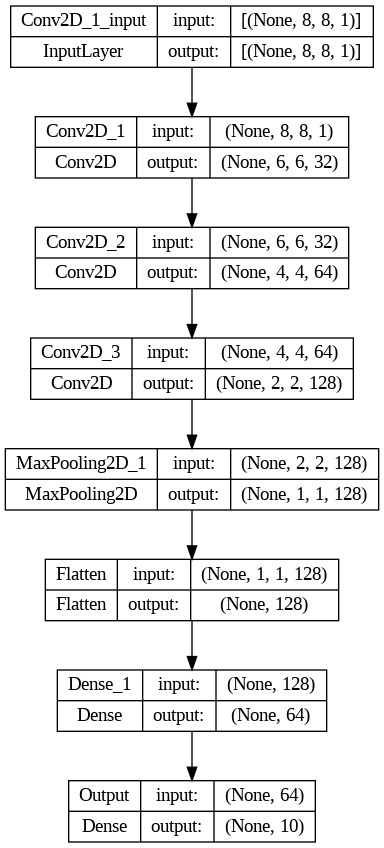

In [21]:
from tensorflow.keras.utils import plot_model

# Assuming your model is stored in the variable 'model'
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


5) Training Process

In [24]:
model = Sequential()
model.add(Flatten(input_shape=(64, 1)))
# ... add other layers ...

In [26]:
from tensorflow.keras.utils import plot_model

# Assuming your model is stored in the variable 'model'
model.compile(optimizer='adam', loss='mean_squared_error')
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)

Epoch 1/50
18/18 [==============================] - 1s 24ms/step - loss: 26.0175 - val_loss: 24.4711
Epoch 2/50
18/18 [==============================] - 0s 8ms/step - loss: 26.0175 - val_loss: 24.4711
Epoch 3/50
18/18 [==============================] - 0s 9ms/step - loss: 26.0175 - val_loss: 24.4711
Epoch 4/50
18/18 [==============================] - 0s 8ms/step - loss: 26.0175 - val_loss: 24.4711
Epoch 5/50
18/18 [==============================] - 0s 6ms/step - loss: 26.0175 - val_loss: 24.4711
Epoch 6/50
18/18 [==============================] - 0s 5ms/step - loss: 26.0175 - val_loss: 24.4711
Epoch 7/50
18/18 [==============================] - 0s 4ms/step - loss: 26.0175 - val_loss: 24.4711
Epoch 8/50
18/18 [==============================] - 0s 5ms/step - loss: 26.0175 - val_loss: 24.4711
Epoch 9/50
18/18 [==============================] - 0s 5ms/step - loss: 26.0175 - val_loss: 24.4711
Epoch 10/50
18/18 [==============================] - 0s 4ms/step - loss: 26.0175 - val_loss: 24.471

In convolutional neural networks, max pooling is a downsampling technique that is frequently used to minimize the spatial dimensions of feature maps while preserving the most crucial information. The input feature map is divided into rectangular, non-overlapping parts, and only the maximum value from each zone is kept in the process.

In [28]:
# Define the model to output feature maps
layer_outputs = [model.layers[0].output]  # Output of the first convolutional layer

feature_map_model = Model(inputs=model.input, outputs=layer_outputs)

# Use this model to predict on a sample input to get the feature maps
feature_maps = feature_map_model.predict(X_train[:1])  # Using the first image in the train set

# Feature maps from the first convolutional layer
feature_maps_from_first_layer = feature_maps[0]

1/1 [==============================] - 0s 146ms/step


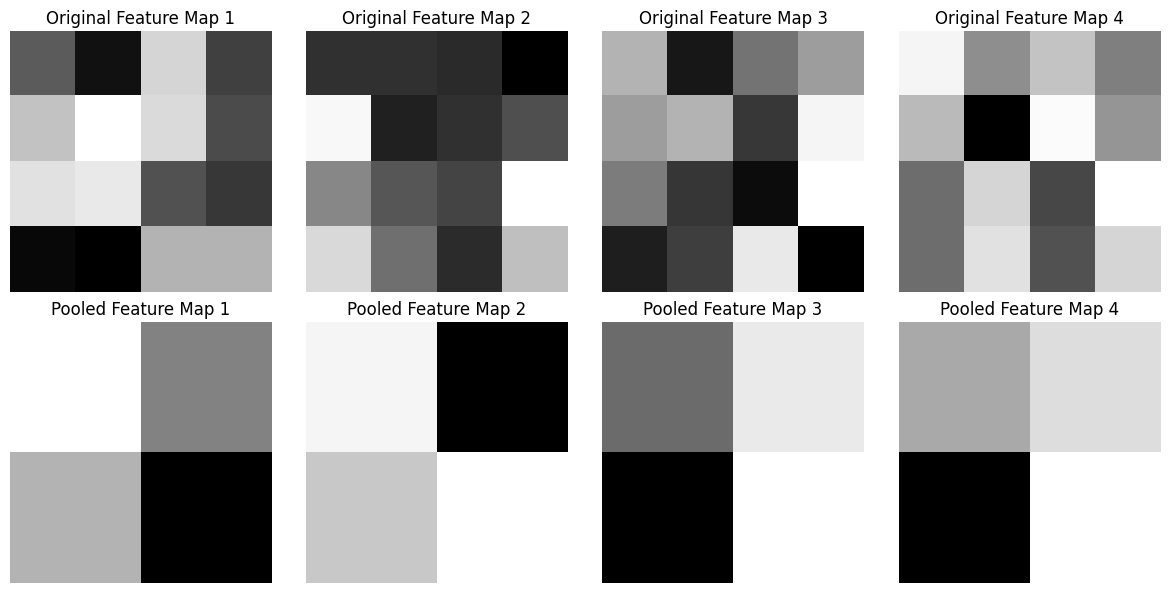

In [30]:
# Import the necessary modules
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Define the max_pooling function using TensorFlow
def max_pooling(feature_map, pool_size=(2, 2)):
    pooled_feature_map = tf.keras.layers.MaxPooling2D(pool_size=pool_size)(feature_map)
    return pooled_feature_map.numpy()

# Perform max pooling on the random feature map
pooled_feature_map = max_pooling(random_feature_map)

# Visualize the original and pooled feature maps
num_filters_to_visualize = 4
fig, axes = plt.subplots(2, num_filters_to_visualize, figsize=(12, 6))
for i in range(num_filters_to_visualize):
    # Original feature map
    axes[0, i].imshow(random_feature_map[0, :, :, i], cmap='gray')
    axes[0, i].set_title(f'Original Feature Map {i+1}')
    axes[0, i].axis('off')
    # Pooled feature map
    axes[1, i].imshow(pooled_feature_map[0, :, :, i], cmap='gray')
    axes[1, i].set_title(f'Pooled Feature Map {i+1}')
    axes[1, i].axis('off')
plt.tight_layout()
plt.show()

Effect of Maxpooling with feature maps

IndexError: too many indices for array: array is 1-dimensional, but 4 were indexed

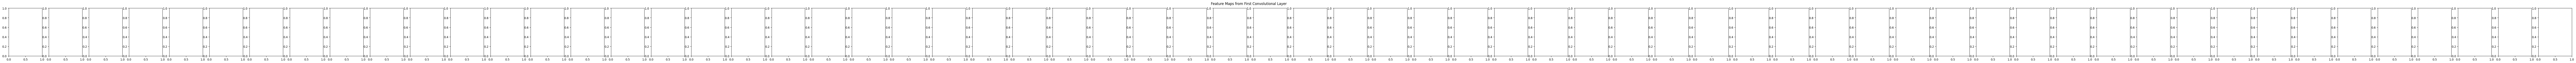

In [39]:
import matplotlib.pyplot as plt

def plot_feature_maps(feature_maps, title):
    num_maps = feature_maps.shape[-1]  # Get the number of feature maps
    fig, axes = plt.subplots(1, num_maps, figsize=(num_maps * 2.5, 3))  # Dynamic sizing of the plot
    fig.suptitle(title)

    if num_maps == 1:  # If there is only one feature map, axes is not an array
        axes = [axes]

    for i, ax in enumerate(axes):
        # Displaying the i-th feature map
        ax.imshow(feature_maps[0, :, :, i], cmap='gray', aspect='auto')
        ax.axis('off')
    plt.show()

# Now using the function to plot the feature maps
# Plot feature maps before and after pooling
plot_feature_maps(feature_maps_from_first_layer, "Feature Maps from First Convolutional Layer")
plot_feature_maps(feature_maps_from_second_layer, "Feature Maps from Second Convolutional Layer")


In [40]:
def plot_feature_maps(feature_maps, title):
    # Check if the input array is 4-dimensional
    if len(feature_maps.shape) != 4:
        raise ValueError("Input array must be 4-dimensional.")

    num_maps = feature_maps.shape[-1]
    fig, axes = plt.subplots(1, num_maps, figsize=(num_maps * 2.5, 3))
    fig.suptitle(title)

    if num_maps == 1:
        axes = [axes]

    for i, ax in enumerate(axes):
        ax.imshow(feature_maps[0, :, :, i], cmap='gray', aspect='auto')
        ax.axis('off')
    plt.show()

In [45]:
print(feature_maps_from_first_layer.shape)

(64,)


In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(8, 8, 1), padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),  # Reduce dimension to 4x4
    Conv2D(128, (3, 3), activation='relu', padding='same'),  # Using padding to maintain dimension
    Flatten(),  # Flattening the outputs from the convolutional layers
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # Output layer with softmax activation for 10 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 8, 8, 32)          320       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                      

K-Fold

In [48]:
# Train the model
print(f'Training for fold {fold_no}...')
history = model.fit(X_train_fold, y_train[train_idx],
                        batch_size=32, epochs=10, validation_data=(X_test_fold, y_train[test_idx]))

# Saving scores
scores = model.evaluate(X_test_fold, y_train[test_idx], verbose=0)
print(f'Score for fold {fold_no}: {model.metrics_names[1]} of {scores[1]*100}%')
accuracies.append(scores[1])
losses.append(scores[0])

Training for fold 1...
Epoch 1/10
36/36 [==============================] - 3s 33ms/step - loss: 1.8040 - accuracy: 0.3934 - val_loss: 0.7367 - val_accuracy: 0.8507
Epoch 2/10
36/36 [==============================] - 1s 37ms/step - loss: 0.6938 - accuracy: 0.7842 - val_loss: 0.2435 - val_accuracy: 0.9549
Epoch 3/10
36/36 [==============================] - 1s 34ms/step - loss: 0.3415 - accuracy: 0.8938 - val_loss: 0.1251 - val_accuracy: 0.9688
Epoch 4/10
36/36 [==============================] - 1s 21ms/step - loss: 0.2724 - accuracy: 0.9138 - val_loss: 0.0897 - val_accuracy: 0.9861
Epoch 5/10
36/36 [==============================] - 1s 22ms/step - loss: 0.1657 - accuracy: 0.9504 - val_loss: 0.0626 - val_accuracy: 0.9861
Epoch 6/10
36/36 [==============================] - 1s 24ms/step - loss: 0.1256 - accuracy: 0.9634 - val_loss: 0.0625 - val_accuracy: 0.9757
Epoch 7/10
36/36 [==============================] - 1s 23ms/step - loss: 0.0775 - accuracy: 0.9791 - val_loss: 0.0334 - val_accurac

 Evaluation

In [54]:
X_test = X_test.reshape(-1, 8, 8, 1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the results
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

12/12 [==============================] - 0s 12ms/step - loss: 0.0380 - accuracy: 0.9861
Test Loss: 0.037978000938892365
Test Accuracy: 0.9861111044883728


Model is evaluated on the test set.
Test loss and accuracy are reported.

In [55]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

12/12 [==============================] - 49s 6ms/step
Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0]
 [ 0  2  0  0  0  0  0  0 28  0]
 [ 0  0  0  0  0  0  0  0  1 39]]


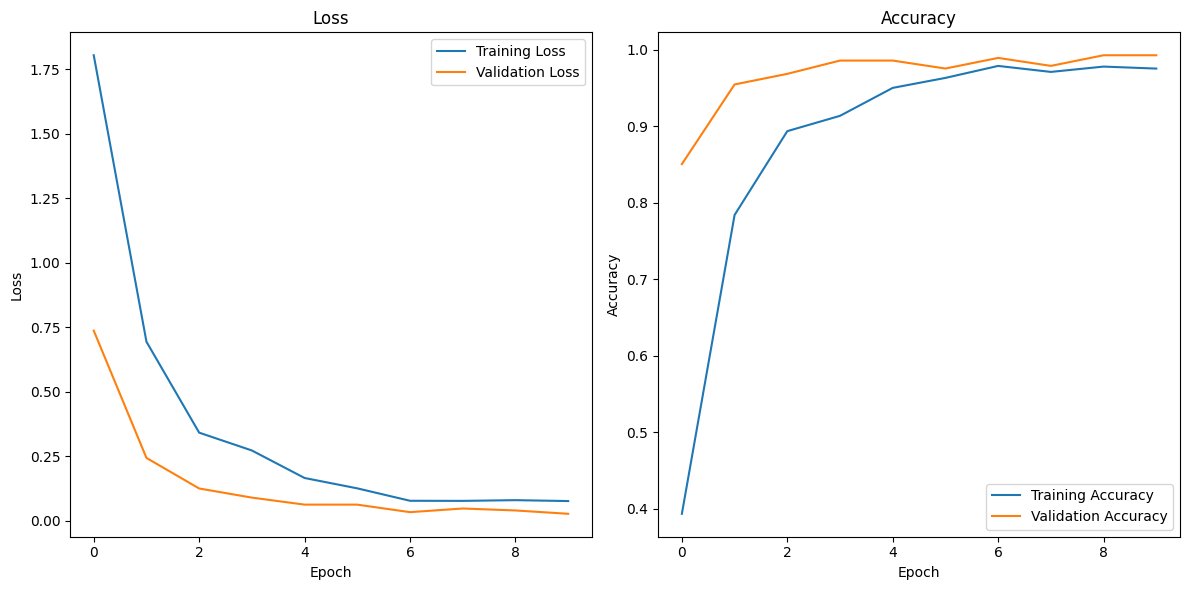

In [56]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Conclusion: the CNN model showed strong learning and generalization ability for handwritten digit identification overall. The model's capacity to generalize to new data was shown by the accuracy metrics on the test set, and the training and validation loss curves converged, signifying effective optimization. Additionally, the confusion matrix revealed regions that could want development by offering insights into the model's performance across various digit classes. This research helped to deepen understanding of deep learning techniques in computer vision applications by providing hands-on experience with CNN installation, training, evaluation, and analysis for image classification tasks.